# Fake News Classifier

## import required libraries

In [178]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import warnings

## remove warning

In [179]:
warnings.filterwarnings('ignore')

## load dataset

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## check null value is present or not

In [3]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## drop null values

In [4]:
train.dropna(inplace=True)

In [5]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [198]:
train['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

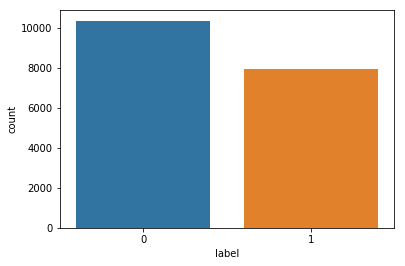

In [216]:
import seaborn as sns
sns.countplot(train['label'])

## separate independent and dependent features 

In [6]:
X = train.drop("label",axis=1)
y = train['label']

In [7]:
X.shape

(18285, 4)

In [8]:
y.shape

(18285,)

In [9]:
X.reset_index(inplace=True)

## remove stopwards from sentences

In [10]:
from nltk.stem import PorterStemmer
import re
ps = PorterStemmer()
corpus=[]

for i in range(len(X.index)):
    rev = re.sub('[^a-zA-Z]',' ',X['title'][i])
    rev = rev.lower()
    rev = rev.split()
    
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [11]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

## import libraries

In [12]:
from tensorflow.keras.layers import Dense , Dropout , Embedding , LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

## one hot representation (convert words into indexes)

In [13]:
voc_size = 10000
onehot = [one_hot( word, voc_size) for word in corpus]
onehot

[[9615, 3369, 4258, 5742, 9131, 1276, 9941, 325, 1894, 5706],
 [4971, 2400, 6073, 6041, 9244, 8790, 6098],
 [9886, 319, 5895, 5085],
 [5860, 2882, 3439, 9549, 7187, 791],
 [3515, 9244, 3085, 2533, 9542, 2509, 9244, 5998, 3137, 9197],
 [3014,
  9584,
  459,
  1321,
  7068,
  3764,
  1076,
  4049,
  2027,
  9234,
  1707,
  8559,
  1726,
  5589,
  6098],
 [1089, 7148, 917, 9430, 4205, 4974, 7183, 8175, 2282, 346, 1532],
 [3464, 1491, 58, 5020, 6215, 9407, 3764, 4386, 2282, 346, 1532],
 [3019, 5782, 6889, 2778, 5225, 5518, 7116, 3059, 3764, 3568],
 [6848, 335, 6064, 1894, 3511, 2563, 3832, 1752],
 [9873, 2867, 3453, 9498, 3386, 9105, 774, 5750, 9365, 9421, 7928],
 [9549, 8219, 9131, 5518, 3764, 6215],
 [4421, 447, 4179, 4388, 6307, 2495, 7655, 9779, 8969],
 [8593, 9577, 3520, 1708, 8052, 5668, 8314, 2282, 346, 1532],
 [7384, 3066, 7167, 8829, 5505, 2282, 346, 1532],
 [6767, 6872, 9480, 8195, 6113, 8993, 6725, 1911, 7864, 1283],
 [1664, 9196, 2400],
 [2442, 2480, 7364, 5088, 3764, 1110, 672

## make all sentences(list of per sentence index) of equal size 

In [14]:
max_sen_len=20
embedding = pad_sequences(onehot,maxlen=max_sen_len,padding='pre')
embedding

array([[   0,    0,    0, ...,  325, 1894, 5706],
       [   0,    0,    0, ..., 9244, 8790, 6098],
       [   0,    0,    0, ...,  319, 5895, 5085],
       ...,
       [   0,    0,    0, ..., 2282,  346, 1532],
       [   0,    0,    0, ..., 8643, 5056, 6997],
       [   0,    0,    0, ..., 8326, 5581, 1193]])

## convert embedding data(list) into array

In [15]:
import numpy as np
X_fnl = np.array(embedding)
Y_fnl = np.array(y)

In [16]:
len(X_fnl) , len(Y_fnl)

(18285, 18285)

## split data into train and test

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_fnl,Y_fnl,test_size=0.1,random_state=51)

In [18]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((16456, 20), (1829, 20), (16456,), (1829,))

In [19]:
X_train

array([[   0,    0,    0, ..., 3593, 2675, 6098],
       [   0,    0,    0, ..., 2282,  346, 1532],
       [   0,    0,    0, ..., 5071, 8790,   58],
       ...,
       [   0,    0,    0, ..., 1520, 2916, 3526],
       [   0,    0,    0, ..., 2282,  346, 1532],
       [   0,    0,    0, ..., 2510, 8833, 4572]])

## define layers

In [20]:
dim=45
model = Sequential()
model.add(Embedding(voc_size , dim , input_length=max_sen_len))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1 , activation='sigmoid'))
model.compile(optimizer="adam" , loss="binary_crossentropy", metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 45)            450000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 45)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               196800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 647,001
Trainable params: 647,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train , Y_train , validation_data=(X_test,Y_test) , epochs=30 , batch_size=16)

Epoch 1/30
1029/1029 [==============================] - 23s 21ms/step - loss: 0.3263 - accuracy: 0.8424 - val_loss: 0.1677 - val_accuracy: 0.9295
Epoch 2/30
1029/1029 [==============================] - 21s 21ms/step - loss: 0.1149 - accuracy: 0.9582 - val_loss: 0.1608 - val_accuracy: 0.9344
Epoch 3/30
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0700 - accuracy: 0.9745 - val_loss: 0.1922 - val_accuracy: 0.9295
Epoch 4/30
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.2306 - val_accuracy: 0.9295
Epoch 5/30
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.2426 - val_accuracy: 0.9284
Epoch 6/30
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.2710 - val_accuracy: 0.9306
Epoch 7/30
1029/1029 [==============================] - 22s 21ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.3340 -

## Prefiction

In [180]:
pred = model.predict_classes(X_test)

In [181]:
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## Evaluation

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(f"Accuracy  \n{accuracy_score(pred,Y_test)}")
print(f"Confusion Matrix =\n {confusion_matrix(pred,Y_test)}")
print(f"Accuracy =\n {classification_report(pred,Y_test)}")

Accuracy  
0.9311098961180974
Confusion Matrix =
 [[998  66]
 [ 60 705]]
Accuracy =
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1064
           1       0.91      0.92      0.92       765

   micro avg       0.93      0.93      0.93      1829
   macro avg       0.93      0.93      0.93      1829
weighted avg       0.93      0.93      0.93      1829



## Save model

In [156]:
model.save('Fake_News_Classifier.h5')

## load model

In [164]:
from keras.models import load_model
classifier = load_model('Fake_News_Classifier.h5')

## Test dataset load

In [158]:
test = pd.read_csv("test.csv")
test.isnull().sum()

Unnamed: 0    0
id            0
title         0
author        0
text          0
dtype: int64

In [159]:
test.shape

(4575, 5)

In [160]:
test['title'][1]

'#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police'

## Testing of Model on test dataset(Multiple sentence testing)

In [183]:
def test_model(dataset):
    corpus1=[]

    for i in range(len(dataset.index)):
        rev = re.sub('[^a-zA-Z]',' ',dataset[i])
        rev = rev.lower()
        rev = rev.split()

        rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
        rev = ' '.join(rev)
        corpus1.append(rev)
    
        
    voc_size1 = 10000
    onehot1 = [one_hot( word, voc_size) for word in corpus1]

    max_sen_len1=20
    embedding1 = pad_sequences(onehot1,maxlen=max_sen_len,padding='pre')
    
    X = np.array(embedding1)
    pred1 = classifier.predict_classes(X)
    return pred1

In [184]:
pred1 = test_model(test['title'])

In [185]:
pred1

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [186]:
pred1 = ["Real" if i==1 else "Fake" for i in pred1 ]

In [187]:
len(pred1) , len(test['title'])

(4575, 4575)

In [188]:
test_data = pd.DataFrame(np.c_[test['title'] ,pred1 ] , columns=['News' , 'Label'] )

In [189]:
test_data

,News,Label
0,"Specter of Trump Loosens Tongues, if Not Purse...",Fake
1,#NoDAPL: Native American Leaders Vow to Stay A...,Real
2,"Tim Tebow Will Attempt Another Comeback, This ...",Fake
3,Keiser Report: Meme Wars (E995),Real
4,Pelosi Calls for FBI Investigation to Find Out...,Fake
5,Weekly Featured Profile – Randy Shannon,Fake
6,184 U.S. generals and admirals endorse Trump f...,Real
7,“Working Class Hero” by John Brennon,Real
8,The Rise of Mandatory Vaccinations Means the E...,Real
9,Communists Terrorize Small Business,Real


## Testing of Model on a single sentence

In [190]:
def test_model(dataset):
    corpus1=[]

    rev = re.sub('[^a-zA-Z]',' ',dataset)
    rev = rev.lower()
    rev = rev.split()

    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus1.append(rev)
    
        
    voc_size1 = 10000
    onehot1 = [one_hot( word, voc_size) for word in corpus1]

    max_sen_len1=20
    embedding1 = pad_sequences(onehot1,maxlen=max_sen_len,padding='pre')
    
    X = np.array(embedding1)
    pred1 = classifier.predict_classes(X)
    if pred1 == 1:
        return "Message is Real"
    return "Message is Fake"

In [191]:
pred2 = test_model('Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times')
pred2

'Message is Fake'

In [192]:
pred2 = test_model('#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police')
pred2

'Message is Real'

# Thank You !!!!!!!!!!